# Imports

In [43]:
import warnings
warnings.filterwarnings("ignore")
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from subprocess import check_output
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
%matplotlib inline

import itertools
from sklearn.metrics import confusion_matrix

In [3]:
with open("/content/drive/MyDrive/roadsigndata/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/drive/MyDrive/roadsigndata/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/MyDrive/roadsigndata/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

# Data Check

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [9]:
# Check shapes
print(X_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


36

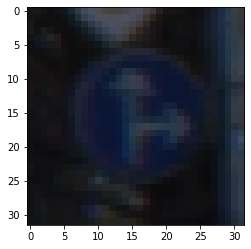

In [12]:
i = 1001
plt.imshow(X_train[i])
y_train[i]

# Data Preparation

In [15]:
# Shuffle dataset
X_train, y_train = shuffle(X_train, y_train)

In [16]:
# Transform data to grayscale
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True)

# Normalize
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

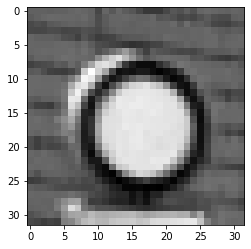

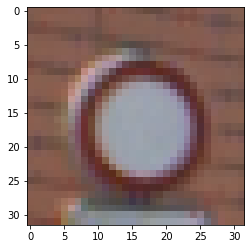

In [18]:
# check
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

# Model training

## Build model

In [21]:
image_shape = X_train_gray[i].shape

In [22]:
cnn_model = tf.keras.Sequential()
cnn_model.add(tf.keras.layers.Conv2D(32,3, 3, input_shape = image_shape, activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(tf.keras.layers.Dropout(0.25))
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dropout(0.5))
cnn_model.add(tf.keras.layers.Dense(43, activation = 'sigmoid'))

In [24]:
# Compile
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False),metrics =['accuracy'])

In [26]:
history = cnn_model.fit(X_train_gray_norm,
                       y_train,
                        batch_size=32,
                        epochs=60,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/60
1088/1088 [==============================] - 27s 22ms/step - loss: 1.8989 - accuracy: 0.4716 - val_loss: 0.8041 - val_accuracy: 0.7834
Epoch 2/60
1088/1088 [==============================] - 21s 20ms/step - loss: 0.7040 - accuracy: 0.7853 - val_loss: 0.4515 - val_accuracy: 0.8642
Epoch 3/60
1088/1088 [==============================] - 18s 17ms/step - loss: 0.4791 - accuracy: 0.8526 - val_loss: 0.3172 - val_accuracy: 0.9034
Epoch 4/60
1088/1088 [==============================] - 21s 19ms/step - loss: 0.3646 - accuracy: 0.8858 - val_loss: 0.3135 - val_accuracy: 0.9166
Epoch 5/60
1088/1088 [==============================] - 18s 16ms/step - loss: 0.3089 - accuracy: 0.9049 - val_loss: 0.3066 - val_accuracy: 0.9206
Epoch 6/60
1088/1088 [==============================] - 20s 18ms/step - loss: 0.2638 - accuracy: 0.9174 - val_loss: 0.2270 - val_accuracy: 0.9340
Epoch 7/60
1088/1088 [==============================] - 24s 22ms/step - loss: 0.2469 - accuracy: 0.9234 - val_loss: 0.2260 -

# Analysis

In [29]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.9458


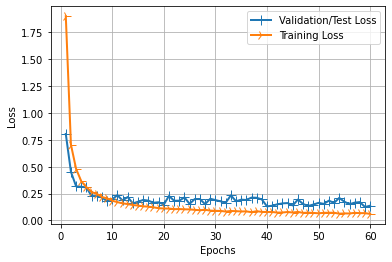

In [34]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label= 'Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

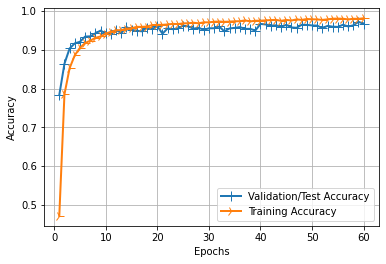

In [36]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label= 'Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

395/395 [==============================] - 2s 6ms/step


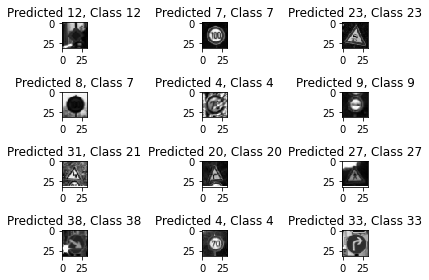

In [42]:
predicted_classes = np.argmax(cnn_model.predict(X_test_gray_norm), axis=-1)
y_true = y_test

for i in range(0,12):
    plt.subplot(4,3,i+1)
    plt.imshow(X_test_gray_norm[i+10].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i+10], y_true[i+10]))
    plt.tight_layout()

395/395 [==============================] - 2s 5ms/step


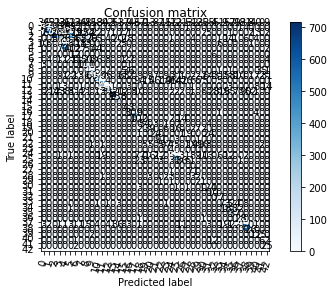

In [48]:
# Confusion matrix check
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75) 
    plt.yticks(tick_marks, classes)
    

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


model = tf.keras.models.load_model('/content/drive/MyDrive/roadsigndata/trafficSign.h5')
predictions = np.argmax(model.predict(X_test_gray), axis=-1)

class_names = range(43)
cm = confusion_matrix(predictions,y_test)

plt.figure(2)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')